![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/Logo-BTS.jpg)

# Session 6: Decision Trees EXERCISES


### Filipa Peleja <filipa.peleja@bts.tech>
### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech>

## Classical Data Analysis (05-03-2021)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_10/Session_10_Classical_Data_Analysis_EXERCISES.ipynb)

## EXERCISE 1 - Naive Bayes

We will use a file called 'person_data.txt'. It contains 100 random person data, male and female, with body sizes, weights and gender tags.

In [1]:
import pandas as pd
import numpy as np
import requests
url = 'https://github.com/vfp1/bts-cda-2020/raw/main/Session_10/person_data.txt'

columns = ['name','height','weight','gender']
df= pd.read_csv(url, header = None, sep = ' ')

df[0] = df[0] + ' ' + df[1]
df = df.drop(columns = 1)
df.columns = columns

df.weight = df.weight.apply(lambda x: int(x))

df.head()

,name,height,weight,gender
0,Randy Carter,184,73,male
1,Stephanie Smith,149,52,female
2,Cynthia Watson,174,63,female
3,Jessie Morgan,175,67,male
4,Katherine Carter,183,81,female


**Q1. Designing a Feature class**

The Feature class needs a label, e.g. "heights" or "firstnames". If the feature values are numerical we may want to "bin" them to reduce the number of possible feature values. The heights from our persons have a huge range and we have only 50 measured values for our Naive Bayes classes "male" and "female". We will bin them into ranges "130 to 134", "135 to 139", "140 to 144" and so on by setting bin_width to 5. There is no way of binning the first names, so bin_width will be set to None.

The method frequency returns the number of occurrencies for a certain feature value or a binned range.

In [2]:
#height_bins =
def bin_column(feature, bin_width):
  start = feature.min()
  end = feature.max() + bin_width
  
  bins_lowers = list(range( start, end, bin_width))
  bins_txt = [str(bins_lowers[i]) + '-' + str(bins_lowers[i] + bin_width - 1) for i, j in enumerate(bins_lowers)]

  bin_out = []
  for f in feature: bin_out.append( bins_txt[int((f/bin_width) - (start/bin_width))] )

  return bin_out

df.insert(2, 'height_bin', bin_column(df.height, 5))
df.insert(4, 'weight_bin', bin_column(df.weight, 4))
df

,name,height,height_bin,weight,weight_bin,gender
0,Randy Carter,184,181-185,73,70-73,male
1,Stephanie Smith,149,146-150,52,50-53,female
2,Cynthia Watson,174,171-175,63,62-65,female
3,Jessie Morgan,175,171-175,67,66-69,male
4,Katherine Carter,183,181-185,81,78-81,female
...,...,...,...,...,...,...
95,Jessie Thomas,168,166-170,69,66-69,female
96,Emily Gonzalez,156,156-160,51,50-53,female
97,Doris Nelson,167,166-170,40,38-41,female
98,Louis Bennett,161,161-165,18,18-21,male


**Q2. Design the features**

We will create now two feature classes Feature for the height values of the person data set. One Feature class contains the height for the Naive Bayes class "male" and one the heights for the class "female"

In [4]:
nb_df = pd.DataFrame(np.sort(df.height_bin.unique()), columns = ['height_bin'])

mf = []
ff = []
for h in nb_df.height_bin:
  mf.append(len(df[df.gender == 'male'][df.height_bin == h]))
  ff.append(len(df[df.gender == 'female'][df.height_bin == h]))

nb_df['male_freq'] = mf
nb_df['female_freq'] = ff
nb_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,height_bin,male_freq,female_freq
0,131-135,0,1
1,136-140,0,1
2,141-145,0,1
3,146-150,0,3
4,151-155,1,5
5,156-160,0,6
6,161-165,6,9
7,166-170,4,14
8,171-175,9,3
9,176-180,6,4


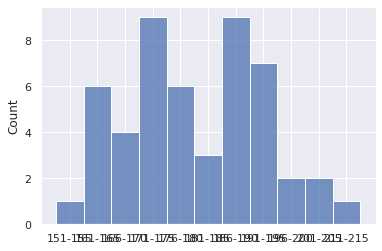

In [12]:
# Male height distribs
import seaborn as sns
sns.set()
sns.histplot(np.sort(df.height_bin[df.gender == 'male']))

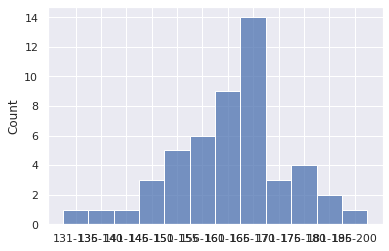

In [18]:
# Female height distribs
sns.histplot(np.sort(df.height_bin[df.gender == 'female']))

**Q3. Plot  the distribution of Male vs Female**

Based on what you observe and your dataset, which Naive Bayes model that you've learned today is the best for this problem?

In [19]:
# Gaussian NB

**Q4. Build your Naive Bayes classifier**
- with and without parameter tunning

## Place your reflections here about what you've learned
* When should I used Naive Bayes?
* Why is Naive Bayes powerful for some problems?
* Why is Naive Bayes known for resolving NLP problems?